In [31]:
import pandas as pd
import matplotlib.pyplot as plt

In [32]:
df = pd.read_csv('listings-san-jose.csv')
df.columns
df.shape

(510, 268)

In [33]:
df1 = pd.read_csv('listings.csv')
df1.columns
df1.shape

(637, 300)

In [34]:
df2 = pd.read_csv('listings-vallejo-and-around.csv')
df2.columns
df2.shape

(500, 295)

<Figure size 5000x5000 with 0 Axes>

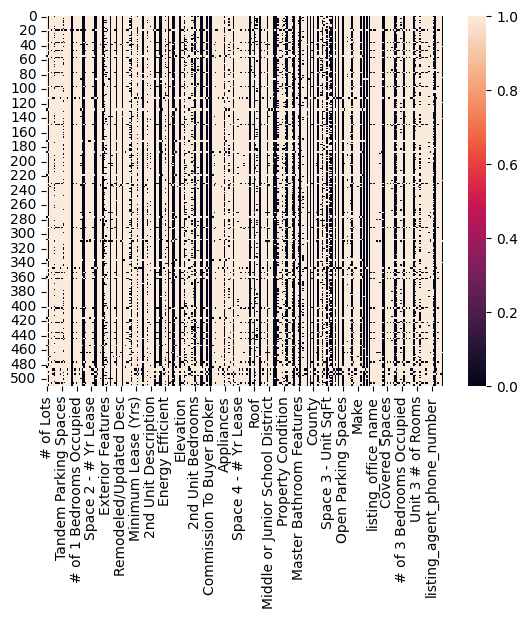

<Figure size 5000x5000 with 0 Axes>

In [35]:
import seaborn as sns
sns.heatmap(df.isna())

plt.figure(figsize=(50,50))

In [36]:
df.head()

,# of Lots,Parking Fee $,Berth Size Width,Unit 4 Approx SqFt,Industrial SqFt,Electric,2 Bedroom Annual Occupancy,# of 4 Bedrooms Occupied,Studio Annual Occupancy,# of Restrooms,...,Family Room Features,Road Surface Type,listing_agent_phone_number,Fireplace Features,property_description,Tenant Allow/Fixed,Total # Owner Occupied,2 Bedroom Rent Range,Loading,listing_detail_monthly_cost
0,NaN,0.0,NaN,NaN,NaN,220 Volts in Kitchen,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,"Gas Starter, Living Room",Welcome to an extraordinary living experience ...,NaN,NaN,NaN,NaN,"$15,025/month"
1,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,modern and updated home in the heart of Silico...,NaN,NaN,NaN,NaN,"$11,662/month"
2,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Affordable MOVE-IN ready TURN-KEY home in the ...,NaN,NaN,NaN,NaN,"$4,839/month"
3,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,SUMMER SPECIAL - The Almaden is a beautiful ne...,NaN,NaN,NaN,NaN,"$6,595/month"
4,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Luxurious and highly desired Sandalwood Townho...,NaN,NaN,NaN,NaN,"$10,289/month"


In [37]:
def lowercase_column_names(column_names):
    return [col.lower() for col in column_names]
same_columns = []
should_drop = []
for i in lowercase_column_names(df.columns):
    for j in lowercase_column_names(df1.columns):
        if i==j:
            same_columns.append(i)

        
print(len(same_columns))


total_same_columns = []
for i in same_columns:
    for j in lowercase_column_names(df2.columns):
        if i==j:
            total_same_columns.append(i)


print(len(total_same_columns))

def find_duplicates(input_list):
    seen = set()
    duplicates = set()
    for item in input_list:
        if item in seen:
            duplicates.add(item)
        else:
            seen.add(item)
    return list(duplicates)

print(find_duplicates(total_same_columns))
print(find_duplicates(same_columns))

266
267
['# of buildings']
['# of buildings']


In [38]:
for i in df2.columns:
    print(i.lower())

find_duplicates(lowercase_column_names(df2.columns))

3 bedroom annual occupancy
4 bedroom annual occupancy
accessibility features
flooring
property condition
pool features
utilities
manufacturer
main level
kitchen features
unit/block/lot
business type
unit 3 type
3 bedroom rent range
unit 4 partial baths
total # owner occupied
covered spaces
horse property
# of lots
fencing
1 bedroom annual occupancy
tenant pays
tenant allow/fixed
park/marina address
second parcel number
electric
property subtype
garage spaces
unit 4 description
# of tenants
space 1 - unit sqft
listing_detail_price
minimum bldg sqft
distance to gas
space 4 - unit sqft
lease deposit
fireplace features
master bedroom features
property_description
unit 4 lease term
appliances
berth size length
tenant allow/sqft
studio rent range
remodeled/updated desc
association fee
association fee frequency
2nd unit occupied
# of guest space(s)
space 2 - unit sqft
percent office
unit 1 full baths
parking ratio
space 3 - $ / sqft
highlights_text
owner pays
2nd unit full baths
zoning
cross 

['# of buildings']

In [39]:
filtered_df = df[df['listing_detail_label'].notna()]

In [40]:
len(filtered_df)

510

In [41]:
percent = {}
for i in df.columns:
    print(f"number of entries in the {i} column: {len(df[i])}  \n Empty rows: {sum(df[i].isna())}")
    percent[i] = sum(df[i].isna())/len(df[i])


number of entries in the # of Lots column: 510  
 Empty rows: 483
number of entries in the Parking Fee $ column: 510  
 Empty rows: 75
number of entries in the Berth Size Width column: 510  
 Empty rows: 502
number of entries in the Unit 4 Approx SqFt column: 510  
 Empty rows: 481
number of entries in the Industrial SqFt column: 510  
 Empty rows: 499
number of entries in the Electric column: 510  
 Empty rows: 409
number of entries in the 2 Bedroom Annual Occupancy column: 510  
 Empty rows: 481
number of entries in the # of 4 Bedrooms Occupied column: 510  
 Empty rows: 481
number of entries in the Studio Annual Occupancy column: 510  
 Empty rows: 481
number of entries in the # of Restrooms column: 510  
 Empty rows: 499
number of entries in the Tandem Parking Spaces column: 510  
 Empty rows: 481
number of entries in the Pool Features column: 510  
 Empty rows: 390
number of entries in the Unit 1 Type column: 510  
 Empty rows: 502
number of entries in the Unit 2 Occupancy column:

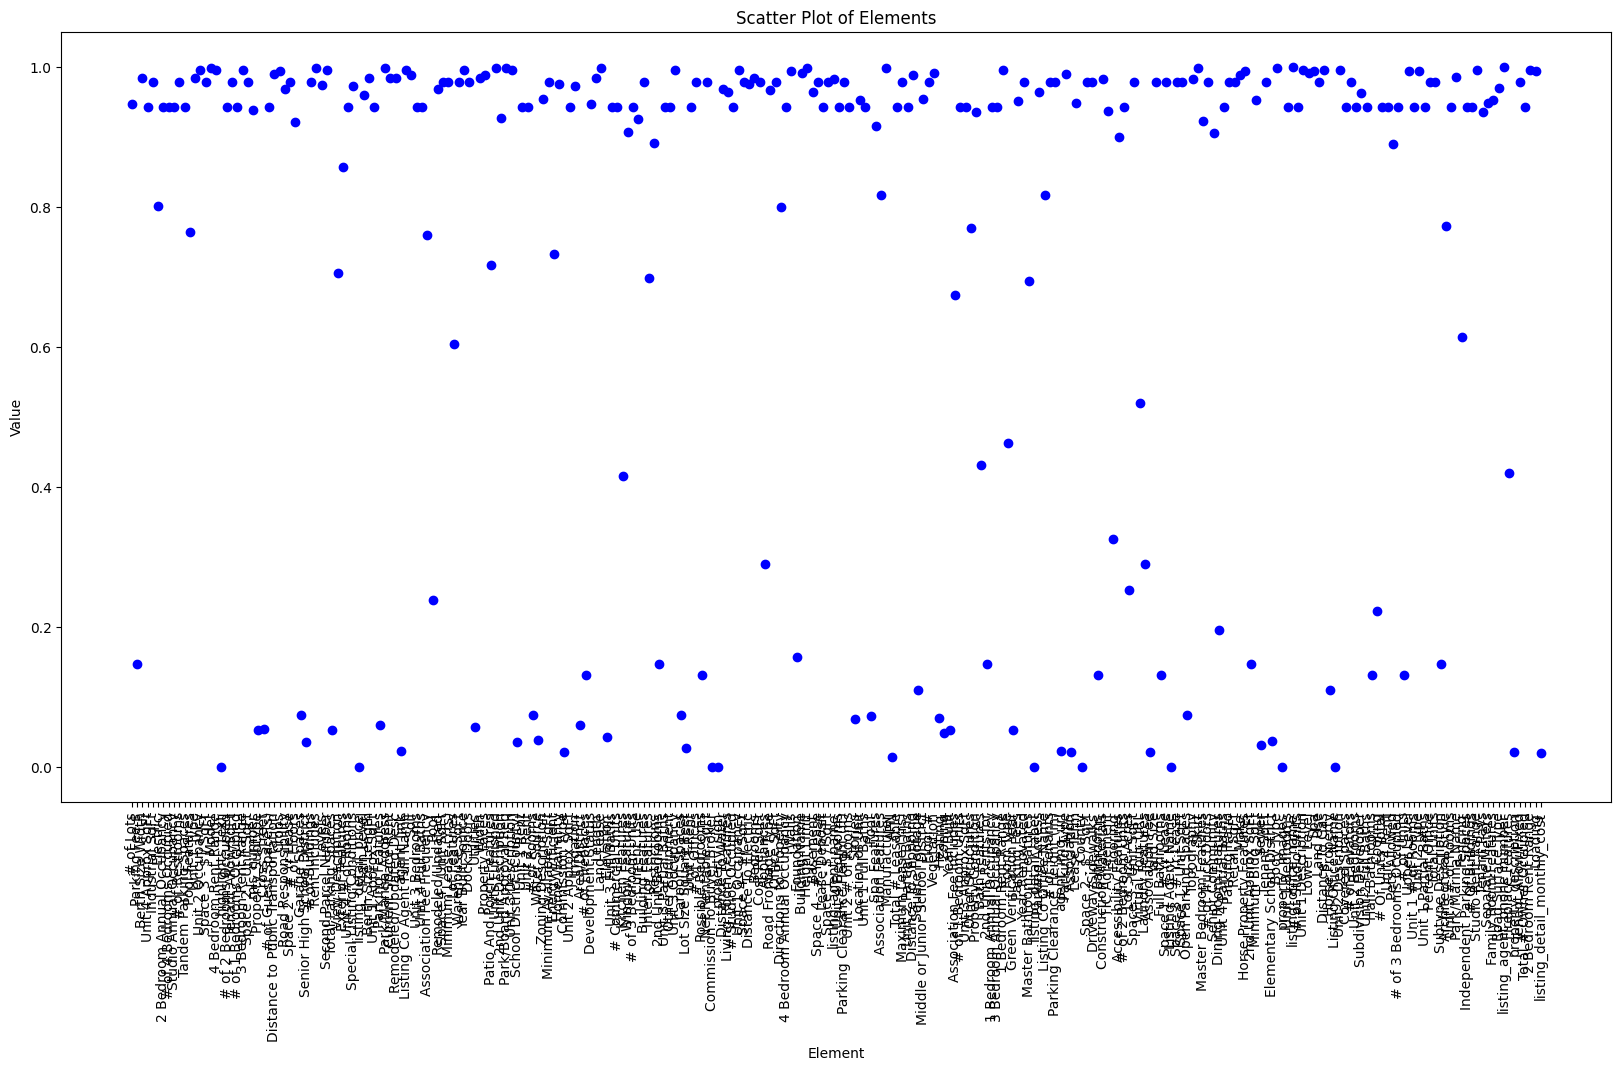

In [42]:
df = pd.DataFrame(list(percent.items()), columns=['Element', 'Value'])

# Plot
plt.figure(figsize=(20, 10))
plt.scatter(df['Element'], df['Value'], color='blue')
plt.xlabel('Element')
plt.ylabel('Value')
plt.title('Scatter Plot of Elements')
plt.xticks(rotation=90)
plt.show()

In [43]:
drop = []
for i in df.columns:
    if sum(df[i].isna())>= 500:
        print(f"dropped {i}")
        drop.append(i)
        df.drop(i, axis = 1)
print(f'the number of columns dropped: {len(drop)}')

the number of columns dropped: 0


In [44]:
def drop_columns_with_missing_values(df, threshold):
    drop = []
    for col in df.columns:
        if df[col].isna().sum() >= threshold:
            print(f"Dropped {col}")
            drop.append(col)
    print(f'The number of columns dropped: {len(drop)}\n\n\n\n')
    return df, len(drop)


drop_columns_with_missing_values(df, 500)
drop_columns_with_missing_values(df2, 500)
drop_columns_with_missing_values(df1, 500)

The number of columns dropped: 0




Dropped Crops
Dropped listing_agent_phone_number
Dropped listing_office_name
Dropped Units Furnished
The number of columns dropped: 4




Dropped Unit 3 Rent
Dropped Listing Co Agent Full Name
Dropped Location
Dropped Vegetation
Dropped Unit 4 Lease Term
Dropped 2 Bedroom Annual Occupancy
Dropped # of Guest Space(s)
Dropped Covered Spaces
Dropped Parking Clearance Height (ft)
Dropped Distance To Sewer
Dropped Body Type
Dropped Space 1 - $ / SqFt
Dropped Subdistrict
Dropped Unit 3 Partial Baths
Dropped Tenant SqFt
Dropped Frontage Type
Dropped # of Restrooms
Dropped Zoning Description
Dropped Unit 2 Lease Term
Dropped Skirt
Dropped Distance To Water
Dropped # Commercial Units
Dropped Distance To Shopping
Dropped Loading
Dropped Rentable
Dropped Road Frontage Type
Dropped # of 4 Bedrooms Occupied
Dropped Special Listing Conditions
Dropped Minimum Available SqFt
Dropped Space 2 - # Yr Lease
Dropped Height Limit
Dropped Year Built Details
Dropped 2nd Un

(     Unit 3 Rent Listing Co Agent Full Name Location Patio And Porch Features  \
 0         3200.0                        NaN      NaN                      NaN   
 1         3200.0                        NaN      NaN                      NaN   
 2            NaN                        NaN      NaN                      NaN   
 3            NaN                        NaN      NaN                  Deck(s)   
 4            NaN                        NaN      NaN                      NaN   
 ..           ...                        ...      ...                      ...   
 632          NaN                        NaN      NaN          Uncovered Patio   
 633          NaN                        NaN      NaN          Uncovered Patio   
 634          NaN                        NaN      NaN                      NaN   
 635          NaN                        NaN      NaN          Uncovered Patio   
 636          NaN                        NaN      NaN          Uncovered Patio   
 
     Vegetatio

In [45]:
import pandas as pd

# Load the datasets
listings0 = pd.read_csv('listings0.csv')
listings1 = pd.read_csv('listings1.csv')
# Assuming you have the other four files uploaded similarly
listings2 = pd.read_csv('listings2.csv')
listings3 = pd.read_csv('listings3.csv')
listings4 = pd.read_csv('listings4.csv')
listings5 = pd.read_csv('listings5.csv')
listings6 = pd.read_csv('listings6.csv')
# Concatenate them into a single DataFrame
all_listings = pd.concat([listings0, listings1, listings2, listings3, listings4, listings5, listings6], ignore_index=True)

# Display the concatenated DataFrame
all_listings.describe()


,Lease Deposit Amount,2 Bedroom Annual Occupancy,Unit 4 Partial Baths,2nd Unit Full Baths,Tenant Allow/SqFt,Space 1 - # Yr Lease,2nd Unit Approx SqFt,# of 3 Bedroom Units,Year Renovated,Total Parking Spaces,...,listing_agent_phone_number,# of Buildings,Unit 4 Rent,Tenant SqFt,Net Rentable SqFt,4 Bedroom Annual Occupancy,Stories,Berth Size Length,Width,# of Truck Doors
count,31.0,319.000000,319.000000,137.000000,197.0,197.0,3599.000000,319.000000,197.000000,4274.000000,...,0.0,197.000000,319.000000,197.000000,197.000000,319.000000,4143.000000,131.0,131.000000,197.000000
mean,0.0,19.360502,0.059561,1.131387,0.0,0.0,15.604057,0.420063,92.116751,2.968882,...,NaN,0.294416,558.714734,102.994924,768.659898,3.040752,1.310644,0.0,19.213740,0.081218
std,0.0,84.965578,0.237044,0.526050,0.0,0.0,120.919617,0.792480,422.087284,14.568695,...,NaN,0.509721,950.007920,833.526694,2650.522710,16.934991,1.272143,0.0,19.158452,0.395772
min,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,-2.000000,...,NaN,0.000000,0.000000,0.000000,-12221.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,0.0,0.000000,0.000000,1.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000
50%,0.0,0.000000,0.000000,1.000000,0.0,0.0,0.000000,0.000000,0.000000,2.000000,...,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,20.000000,0.000000
75%,0.0,0.000000,0.000000,1.000000,0.0,0.0,0.000000,1.000000,0.000000,3.000000,...,NaN,1.000000,1232.500000,0.000000,0.000000,0.000000,2.000000,0.0,24.000000,0.000000
max,0.0,1000.000000,1.000000,3.000000,0.0,0.0,1788.000000,4.000000,2022.000000,500.000000,...,NaN,2.000000,4200.000000,8045.000000,14926.000000,100.000000,23.000000,0.0,112.000000,3.000000


In [46]:
percents_all_listings = {}
for i in all_listings.columns:
    print(f"number of entries in the {i} column: {len(all_listings[i])}  \n Empty rows: {sum(all_listings[i].isna())}")
    percents_all_listings[i] = sum(all_listings[i].isna())/len(all_listings[i])

number of entries in the Lease Term column: 4709  
 Empty rows: 4582
number of entries in the Lease Deposit Amount column: 4709  
 Empty rows: 4678
number of entries in the 2 Bedroom Annual Occupancy column: 4709  
 Empty rows: 4390
number of entries in the Room Type column: 4709  
 Empty rows: 3013
number of entries in the Driveway/Sidewalks column: 4709  
 Empty rows: 3621
number of entries in the Unit 4 Partial Baths column: 4709  
 Empty rows: 4390
number of entries in the Pets Allowed column: 4709  
 Empty rows: 3883
number of entries in the Unit 2 Occupancy column: 4709  
 Empty rows: 4516
number of entries in the Elementary School District column: 4709  
 Empty rows: 2534
number of entries in the 2nd Unit Full Baths column: 4709  
 Empty rows: 4572
number of entries in the Tenant Allow/SqFt column: 4709  
 Empty rows: 4512
number of entries in the Space 1 - # Yr Lease column: 4709  
 Empty rows: 4512
number of entries in the 2nd Unit Approx SqFt column: 4709  
 Empty rows: 1110


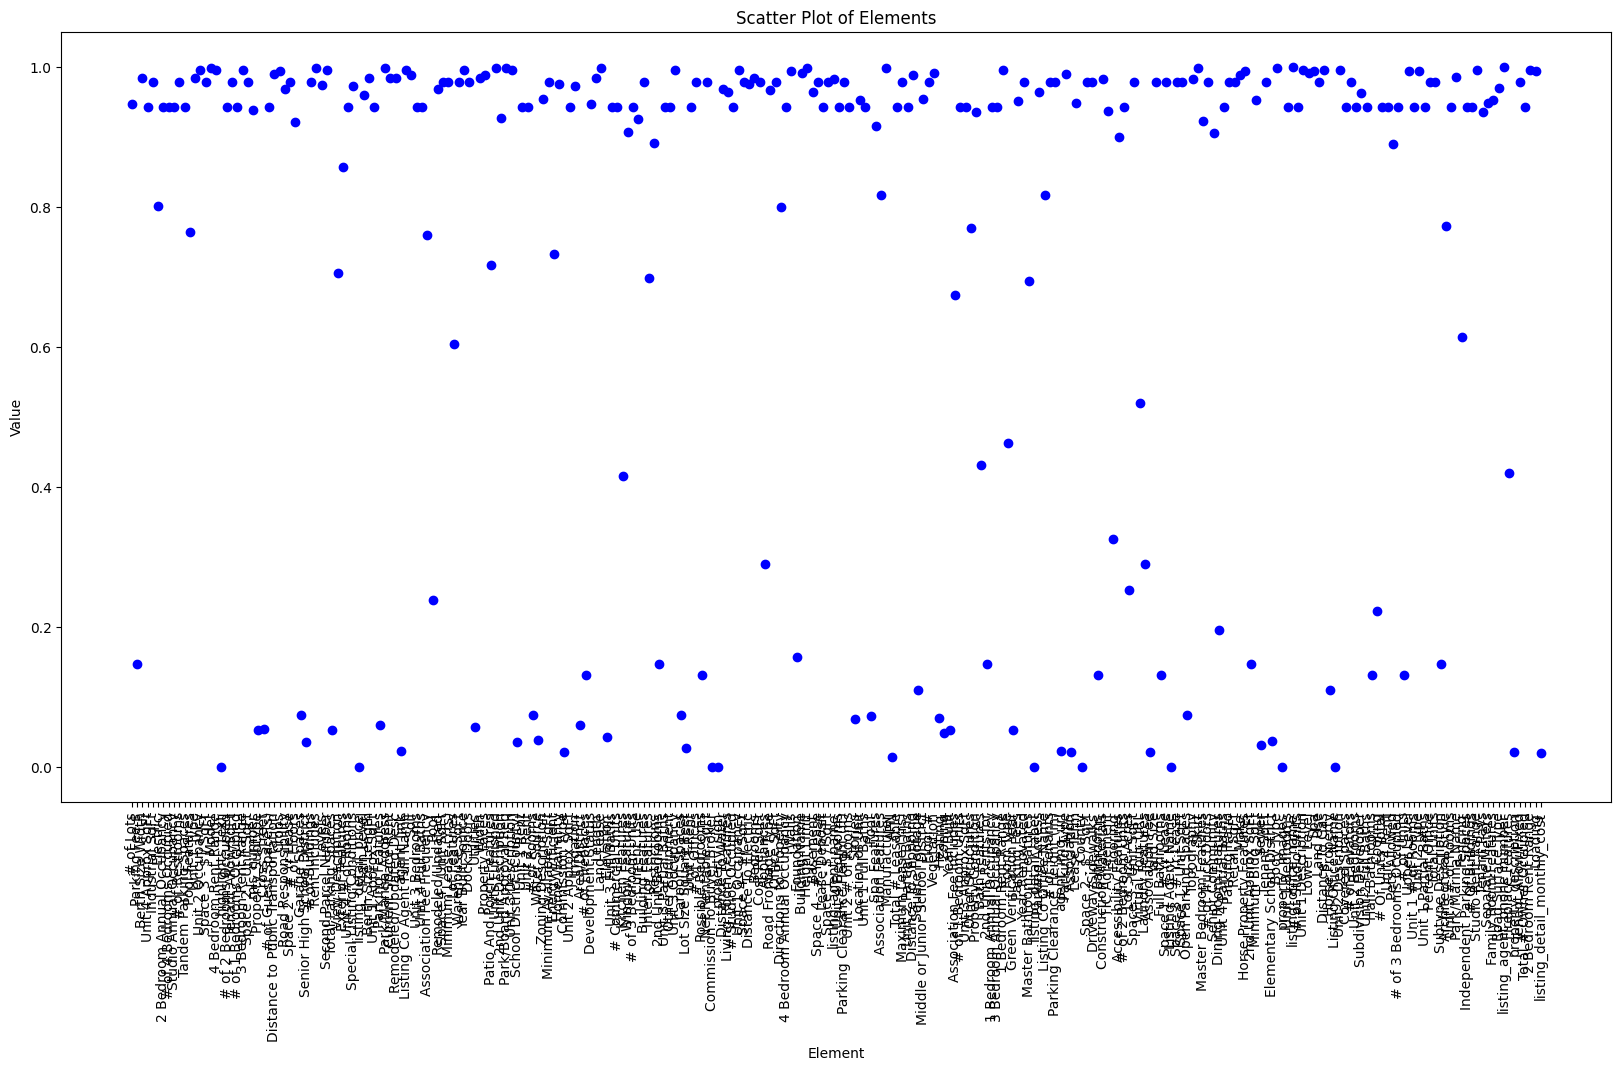

321


In [47]:
all_listings_df = pd.DataFrame(list(percents_all_listings.items()), columns=['Element', 'Value'])

# Plot
plt.figure(figsize=(20, 10))
plt.scatter(df['Element'], df['Value'], color='blue')
plt.xlabel('Element')
plt.ylabel('Value')
plt.title('Scatter Plot of Elements')
plt.xticks(rotation=90)
plt.show()

print(len(all_listings.columns))

In [48]:
all_listings_df.head()

,Element,Value
0,Lease Term,0.973030
1,Lease Deposit Amount,0.993417
2,2 Bedroom Annual Occupancy,0.932257
3,Room Type,0.639839
4,Driveway/Sidewalks,0.768953


In [49]:
drop = []
for i in percents_all_listings.keys():
    if percents_all_listings[i] > 0.80:
        drop.append(i)
        print(f'{i} will be dropped')

print(len(drop))

Lease Term will be dropped
Lease Deposit Amount will be dropped
2 Bedroom Annual Occupancy will be dropped
Unit 4 Partial Baths will be dropped
Pets Allowed will be dropped
Unit 2 Occupancy will be dropped
2nd Unit Full Baths will be dropped
Tenant Allow/SqFt will be dropped
Space 1 - # Yr Lease will be dropped
# of 3 Bedroom Units will be dropped
Location will be dropped
Year Renovated will be dropped
Other Equipment will be dropped
Type Of Sale will be dropped
Unit 1 Occupancy will be dropped
Distance To Water will be dropped
Subdivision will be dropped
Independent Parking Spaces will be dropped
listing_agent_name will be dropped
Parking Clearance Height (ft) will be dropped
Unit 4 Bedrooms will be dropped
Owner Pays will be dropped
2nd Unit Description will be dropped
Restrictions will be dropped
Second Parcel Number will be dropped
# of Studio Units will be dropped
Unit 3 Full Baths will be dropped
Green Building Verification Type will be dropped
Other Structures will be dropped
Un

In [50]:
complete_listings = all_listings.drop(drop,axis =1)

In [51]:
len(complete_listings.columns)

92

In [52]:
for i in complete_listings.columns:
    print(i)


Room Type
Driveway/Sidewalks
Elementary School District
2nd Unit Approx SqFt
Total Parking Spaces
Association Fee Includes
Sewer
Patio And Porch Features
listing_detail_price
Cross Street
# of Fireplaces
Association Fee Frequency
Listing Office Name
property_images
Master Bedroom Features
Full Bathrooms
Living Room Features
Association
Water Source
Lot Features
Dining Room Features
Garage Spaces
Property Condition
Foundation
View Description
Association Fee
Interior Features
Green Verification Year
Fencing
Remodeled/Updated
Utilities
listing_url
Property Subtype
APN
Senior Community
Heating
Laundry Features
Half Bathrooms
Virtual Tour URL
mls_number
agent_img_url
2nd Unit Bedrooms
Main Level
Flooring
Carport Spaces
Pool
Bath Features
Special Listing Conditions
2nd Unit Rents for
School District (County)
Window Features
Appliances
Parking Features
# of Rooms
Middle or Junior School District
property_description
property_sign
Subtype Description
Bathrooms
Listing Agent Name
Fireplace Fea

In [53]:
complete_listings.info()
len(complete_listings['listing_url'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4709 entries, 0 to 4708
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Room Type                         1696 non-null   object 
 1   Driveway/Sidewalks                1088 non-null   object 
 2   Elementary School District        2175 non-null   object 
 3   2nd Unit Approx SqFt              3599 non-null   float64
 4   Total Parking Spaces              4274 non-null   float64
 5   Association Fee Includes          1326 non-null   object 
 6   Sewer                             4122 non-null   object 
 7   Patio And Porch Features          1408 non-null   object 
 8   listing_detail_price              4665 non-null   object 
 9   Cross Street                      4578 non-null   object 
 10  # of Fireplaces                   3730 non-null   float64
 11  Association Fee Frequency         1346 non-null   object 
 12  Listin

4709

In [88]:
complete_listings = complete_listings.dropna(subset=['listing_detail_label']).reset_index()

In [89]:
complete_listings.to_csv('complete_listings.csv', index=False)

In [90]:
sum(complete_listings['listing_detail_label'].isna())


0

In [92]:

complete_listings['listing_detail_label'][1492]



'701 Baltic Cir #711 Redwood City, CA 94065'

In [98]:
import re

# Sample address
address = '701 Baltic Cir #711 Redwood City, CA 94065'

# Regex pattern for ZIP code (5 digits)
pattern = r'\b\d{5}\b'

# Search for the pattern in the address
match = re.search(pattern, address)

# Extract the ZIP code if found
if match:
    zipcode = match.group()
    print(f'The ZIP code is: {zipcode}')
else:
    print('No ZIP code found')

The ZIP code is: 94065


In [102]:
import re
def extract_zipcode(address):
    pattern = r'\b\d{5}\b'
    match = re.search(pattern, address)
    if match:
        return match.group()
    else:
        return None

# Applying the function to the 'listing_detail_label' column and creating a new 'zipcode' column
complete_listings['zipcode'] = complete_listings['listing_detail_label'].apply(extract_zipcode)

# Display the DataFrame to verify the new column
print(complete_listings['zipcode'])

0       94110
1       94110
2       94133
3       94133
4       94002
        ...  
4681    95822
4682    95818
4683    95608
4684    11076
4685    95691
Name: zipcode, Length: 4686, dtype: object


In [103]:
complete_listings.columns

Index(['index', 'Room Type', 'Driveway/Sidewalks',
       'Elementary School District', '2nd Unit Approx SqFt',
       'Total Parking Spaces', 'Association Fee Includes', 'Sewer',
       'Patio And Porch Features', 'listing_detail_price', 'Cross Street',
       '# of Fireplaces', 'Association Fee Frequency', 'Listing Office Name',
       'property_images', 'Master Bedroom Features', 'Full Bathrooms',
       'Living Room Features', 'Association', 'Water Source', 'Lot Features',
       'Dining Room Features', 'Garage Spaces', 'Property Condition',
       'Foundation', 'View Description', 'Association Fee',
       'Interior Features', 'Green Verification Year', 'Fencing',
       'Remodeled/Updated', 'Utilities', 'listing_url', 'Property Subtype',
       'APN', 'Senior Community', 'Heating', 'Laundry Features',
       'Half Bathrooms', 'Virtual Tour URL', 'mls_number', 'agent_img_url',
       '2nd Unit Bedrooms', 'Main Level', 'Flooring', 'Carport Spaces', 'Pool',
       'Bath Features', '

In [110]:
# Create a dictionary to store non-null entries
non_null_entries = {}

# Loop through each column and get the first non-null entry
for column in complete_listings.columns:
    first_non_null = complete_listings[column].dropna().iloc[0]
    non_null_entries[column] = first_non_null

# Convert the dictionary to a DataFrame
non_null_df = pd.DataFrame([non_null_entries])

# Display the resulting DataFrame
print(non_null_df)

   index             Room Type Driveway/Sidewalks Elementary School District  \
0      0  Living Room, Kitchen              Gated     Belmont-Redwood Shores   

   2nd Unit Approx SqFt  Total Parking Spaces  \
0                   0.0                   2.0   

                            Association Fee Includes         Sewer  \
0  Water, Trash, Security, Management, Maintenanc...  Public Sewer   

  Patio And Porch Features listing_detail_price  ... Zoning  \
0          Uncovered Patio             $799,000  ...   RH1D   

                                Association Features  \
0  Spa/Hot Tub, Roof Deck, Pool, Laundry Coin, Gr...   

                          listing_detail_label  \
0  932 Hampshire St #A San Francisco, CA 94110   

                       Kitchen Features Area/District         County  \
0  Wood Counter, Quartz Counter, Island    SF Distric  San Francisco   

                            Master Bathroom Features Stories Commission Type  \
0  Window, Walk-In Closet, Tub, S

In [115]:
fields = [
    'index'
    "listing_url",
    "zipcode",
    "property_description",
    "Year Built",
    "property_images",
    "Property Condition",
    "listing_detail_price",
    "Dining Room Features",
    "Patio And Porch Features",
    "Living Room Features",
    "Window Features",
    "Bath Features",
    "Parking Features",
    "Master Bathroom Features",
    "Master Bedroom Features",
    "Cooling",
    "Heating",
    "Laundry Features",
    "Lot Features",
    "Interior Features",
    "Kitchen Features",
    "Association Features",
    "Appliances",
    "# of Fireplaces",
    "mls_number",
    "Bathrooms",
    "Half Bathrooms",
    "Full Bathrooms",
    "Square Footage",
    "# of Rooms",
    "Area/District",
    "listing_detail_monthly_cost",
    "Total Parking Spaces",
    "Elementary School District",
    "Senior High School District",
    "Middle or Junior School District",
    "Roof",
    "agent_link",
    "Listing Agent Name",
    "Listing Office Name",
    "Remodeled/Updated",
    "Open Parking Spaces",
    "# of Units",
    "highlights_text",
    "School District (County)",
    "Flooring",
    "Architectural Style",
    "County",
    "Pool"
]

final_listings = complete_listings[fields]

In [125]:
single_from_column = {}
for i in final_listings.columns:
    single_from_column[i] = final_listings[i][final_listings[i].notna().idxmax()]


vishwa_df= pd.DataFrame(single_from_column)

ValueError: If using all scalar values, you must pass an index

In [121]:
vishwa_df.head()

NameError: name 'vishwa_df' is not defined